In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as spst
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import arviz as az
from cmdstanpy import cmdstan_path, CmdStanModel

In [2]:
df = pd.read_csv("./dati_polveri/polveri_emilia_PM10.csv")
df.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


In [3]:
def string_date(anno,mese,giorno):
    return str(anno)+"-"+str(mese).zfill(2)+"-"+str(giorno).zfill(2)

In [4]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018].copy()
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']].copy()
aux_df['VALORE'].replace(to_replace=0, value=1, inplace=True)
lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()
lista_log = aux_df.apply(lambda vec : np.log(vec[4]),axis=1).tolist()

final_df = res[['Stazione','VALORE','TipoStazione','TipoArea','Zonizzazione','Altezza','Mese']].copy()
final_df['Date'] = lista_date
final_df['LogVal'] = lista_log

final_df['Mese'].replace(to_replace=1, value='Gennaio', inplace=True)
final_df['Mese'].replace(to_replace=2, value='Febbraio', inplace=True)
final_df['Mese'].replace(to_replace=3, value='Marzo', inplace=True)
final_df['Mese'].replace(to_replace=4, value='Aprile', inplace=True)
final_df['Mese'].replace(to_replace=5, value='Maggio', inplace=True)
final_df['Mese'].replace(to_replace=6, value='Giugno', inplace=True)
final_df['Mese'].replace(to_replace=7, value='Luglio', inplace=True)
final_df['Mese'].replace(to_replace=8, value='Agosto', inplace=True)
final_df['Mese'].replace(to_replace=9, value='Settembre', inplace=True)
final_df['Mese'].replace(to_replace=10, value='Ottobre', inplace=True)
final_df['Mese'].replace(to_replace=11, value='Novembre', inplace=True)
final_df['Mese'].replace(to_replace=12, value='Dicembre', inplace=True)


final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date,LogVal
75727,BADIA,39,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-01,3.663562
75728,BADIA,13,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-02,2.564949
75729,BADIA,12,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-03,2.484907
75730,BADIA,15,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-04,2.708050
75731,BADIA,34,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-05,3.526361


In [5]:
stazioni_df = final_df.copy()
stazioni_df = stazioni_df.sort_values(by=['Stazione'])
## Ordine: alfabetico
stazioni_df = stazioni_df[['Stazione']]
stazioni_df.drop_duplicates(inplace=True)
stazioni_df = stazioni_df.reset_index()
stazioni_df = stazioni_df[['Stazione']]
lista_stazioni = stazioni_df['Stazione'].tolist()

In [6]:
lista_mediane_stazioni = []
for stazione in lista_stazioni:
    aux_df = final_df[final_df['Stazione'] == stazione]
    aux_df = aux_df[['LogVal']]
    logvalori = aux_df.to_numpy()
    lista_mediane_stazioni.append(np.median(logvalori))
    
    
print(lista_mediane_stazioni)

[2.8903717578961645, 3.1354942159291497, 3.2188758248682006, 3.1354942159291497, 3.091042453358316, 2.1972245773362196, 3.2188758248682006, 3.1780538303479458, 3.332204510175204, 2.302585092994046, 2.995732273553991, 3.1354942159291497, 2.302585092994046, 3.295836866004329, 3.044522437723423, 3.091042453358316, 3.4011973816621555, 3.1354942159291497, 3.332204510175204, 2.9444389791664403, 3.258096538021482, 3.2188758248682006, 3.044522437723423, 3.295836866004329, 2.995732273553991, 3.332204510175204, 3.2188758248682006, 2.995732273553991, 3.091042453358316, 3.1780538303479458, 3.1780538303479458, 2.9700856263602153, 3.1354942159291497, 3.2188758248682006, 3.091042453358316, 3.258096538021482, 3.295836866004329, 3.367295829986474, 3.044522437723423, 2.70805020110221, 3.044522437723423, 3.2188758248682006, 3.044522437723423, 2.3978952727983707, 3.4657359027997265, 2.833213344056216, 3.044522437723423, 3.1354942159291497, 3.1354942159291497]


In [7]:
stazioni_df['Mediana'] = lista_mediane_stazioni
stazioni_df = stazioni_df.sort_values(by='Mediana')
stazioni_df.head()

,Stazione,Mediana
5,CASTELLUCCIO,2.197225
12,FEBBIO,2.302585
9,CORTE BRUGNATELLA,2.302585
43,SAVIGNANO DI RIGO,2.397895
39,SAN LEO,2.708050


In [8]:
lista_stazioni_ordinata_per_mediana = stazioni_df['Stazione'].tolist()
final_df['Cat_Stazione_Order_By_Median'] = pd.Categorical(final_df['Stazione'], lista_stazioni_ordinata_per_mediana)
sorted_final_df = final_df.sort_values(by='Cat_Stazione_Order_By_Median')

In [9]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018].copy()
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']].copy()

lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()

final_df = res[['Stazione','VALORE','TipoStazione','TipoArea','Zonizzazione','Altezza','Mese']].copy()
final_df['Date'] = lista_date

final_df['Mese'].replace(to_replace=1, value='Gennaio', inplace=True)
final_df['Mese'].replace(to_replace=2, value='Febbraio', inplace=True)
final_df['Mese'].replace(to_replace=3, value='Marzo', inplace=True)
final_df['Mese'].replace(to_replace=4, value='Aprile', inplace=True)
final_df['Mese'].replace(to_replace=5, value='Maggio', inplace=True)
final_df['Mese'].replace(to_replace=6, value='Giugno', inplace=True)
final_df['Mese'].replace(to_replace=7, value='Luglio', inplace=True)
final_df['Mese'].replace(to_replace=8, value='Agosto', inplace=True)
final_df['Mese'].replace(to_replace=9, value='Settembre', inplace=True)
final_df['Mese'].replace(to_replace=10, value='Ottobre', inplace=True)
final_df['Mese'].replace(to_replace=11, value='Novembre', inplace=True)
final_df['Mese'].replace(to_replace=12, value='Dicembre', inplace=True)


final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date
75727,BADIA,39,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-01
75728,BADIA,13,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-02
75729,BADIA,12,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-03
75730,BADIA,15,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-04
75731,BADIA,34,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-05


In [10]:
lista_stazioni_ordinata_per_mediana = stazioni_df['Stazione'].tolist()
final_df['Cat_Stazione_Order_By_Median'] = pd.Categorical(final_df['Stazione'], lista_stazioni_ordinata_per_mediana)
sorted_final_df = final_df.sort_values(by='Cat_Stazione_Order_By_Median')

In [11]:
date_list = [datetime.date(2018,1,1)]
for i in range(1,365):
    date_list.append(datetime.date(2018,1,1) + datetime.timedelta(days=i))
    
#df_with_stations_as_cols = pd.DataFrame()
#df_with_stations_as_cols['Date'] = date_list
#df_with_stations_as_cols.tail()

In [12]:
aux_df = final_df.copy()
aux_df = aux_df.sort_values(by=['Cat_Stazione_Order_By_Median'])
## Ordine: alfabetico
aux_df = aux_df[['Stazione']]
aux_df.drop_duplicates(inplace=True)
aux_df = aux_df.reset_index()
aux_df = aux_df[['Stazione']]

N_stazioni = aux_df.size

matrix_with_stations_as_cols = np.empty((365,N_stazioni))
matrix_with_stations_as_cols[:] = np.nan
print(matrix_with_stations_as_cols.shape)

(365, 49)


In [13]:
aux_df.head()

,Stazione
0,CASTELLUCCIO
1,FEBBIO
2,CORTE BRUGNATELLA
3,SAVIGNANO DI RIGO
4,SAN LEO


In [14]:
primo_giorno = datetime.date(2018,1,1)

for stazione_idx in range(N_stazioni):
    #print(stazione[0])
    stazione = aux_df.values.tolist()[stazione_idx]
    staz_internal = stazione[0]
    df_solo_stazione = final_df[final_df['Stazione'] == staz_internal]
    
    for val in df_solo_stazione.values.tolist():
        giorno = datetime.date.fromisoformat(val[7])   
        giorno_idx = (giorno - primo_giorno).days        
        matrix_with_stations_as_cols[giorno_idx,stazione_idx] = val[1]
            

In [15]:
matrix_with_stations_as_cols

array([[ 4.,  6., 10., ..., nan, 47., 62.],
       [ 3.,  3.,  4., ..., nan, 27., 40.],
       [ 0.,  5.,  5., ..., nan, 37., 36.],
       ...,
       [ 8., 12.,  4., ..., 39., 59., 56.],
       [ 7.,  6.,  5., ..., 32., 54., 57.],
       [nan, nan, nan, ..., nan, nan, nan]])

In [16]:
lista_stazioni = []
for val in aux_df.values.tolist():
    lista_stazioni.append(val[0])

df_with_stations_as_cols = pd.DataFrame(matrix_with_stations_as_cols, columns = lista_stazioni, index = date_list)

In [17]:
df_with_stations_as_cols

,CASTELLUCCIO,FEBBIO,CORTE BRUGNATELLA,SAVIGNANO DI RIGO,SAN LEO,VERUCCHIO,BADIA,GIARDINI MARGHERITA,PARCO RESISTENZA,PARCO BERTOZZI,...,S. LAZZARO,S. ROCCO,MALCANTONE,FLAMINIA,GIARDINI,MONTEBELLO,CITTADELLA,SAN FRANCESCO,GERBIDO,TIMAVO
2018-01-01,4.0,6.0,10.0,12.0,13.0,25.0,39.0,43.0,51.0,44.0,...,48.0,45.0,44.0,45.0,61.0,51.0,53.0,NaN,47.0,62.0
2018-01-02,3.0,3.0,4.0,3.0,7.0,12.0,13.0,18.0,28.0,22.0,...,22.0,25.0,26.0,36.0,26.0,35.0,25.0,NaN,27.0,40.0
2018-01-03,0.0,5.0,5.0,2.0,0.0,6.0,12.0,16.0,17.0,19.0,...,26.0,28.0,25.0,27.0,30.0,25.0,22.0,NaN,37.0,36.0
2018-01-04,0.0,2.0,3.0,5.0,5.0,21.0,15.0,23.0,39.0,37.0,...,34.0,35.0,30.0,NaN,42.0,37.0,29.0,36.0,38.0,37.0
2018-01-05,4.0,5.0,13.0,7.0,13.0,45.0,34.0,43.0,58.0,51.0,...,52.0,40.0,39.0,71.0,62.0,52.0,48.0,57.0,50.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,8.0,6.0,8.0,8.0,NaN,NaN,19.0,NaN,23.0,21.0,...,24.0,30.0,27.0,30.0,28.0,38.0,34.0,44.0,41.0,34.0
2018-12-28,5.0,6.0,6.0,7.0,NaN,NaN,16.0,NaN,39.0,36.0,...,44.0,48.0,43.0,52.0,59.0,50.0,45.0,33.0,57.0,57.0
2018-12-29,8.0,12.0,4.0,10.0,12.0,24.0,14.0,NaN,43.0,42.0,...,48.0,54.0,49.0,51.0,57.0,48.0,48.0,39.0,59.0,56.0
2018-12-30,7.0,6.0,5.0,11.0,16.0,33.0,19.0,NaN,52.0,48.0,...,49.0,66.0,58.0,60.0,64.0,51.0,51.0,32.0,54.0,57.0


In [18]:
df = df_with_stations_as_cols.copy()

In [19]:
df['day'] = np.arange(0,365,1)

In [20]:
df = df.set_index('day')

In [21]:
df

,CASTELLUCCIO,FEBBIO,CORTE BRUGNATELLA,SAVIGNANO DI RIGO,SAN LEO,VERUCCHIO,BADIA,GIARDINI MARGHERITA,PARCO RESISTENZA,PARCO BERTOZZI,...,S. LAZZARO,S. ROCCO,MALCANTONE,FLAMINIA,GIARDINI,MONTEBELLO,CITTADELLA,SAN FRANCESCO,GERBIDO,TIMAVO
day,,,,,,,,,,,,,,,,,,,,,
0,4.0,6.0,10.0,12.0,13.0,25.0,39.0,43.0,51.0,44.0,...,48.0,45.0,44.0,45.0,61.0,51.0,53.0,NaN,47.0,62.0
1,3.0,3.0,4.0,3.0,7.0,12.0,13.0,18.0,28.0,22.0,...,22.0,25.0,26.0,36.0,26.0,35.0,25.0,NaN,27.0,40.0
2,0.0,5.0,5.0,2.0,0.0,6.0,12.0,16.0,17.0,19.0,...,26.0,28.0,25.0,27.0,30.0,25.0,22.0,NaN,37.0,36.0
3,0.0,2.0,3.0,5.0,5.0,21.0,15.0,23.0,39.0,37.0,...,34.0,35.0,30.0,NaN,42.0,37.0,29.0,36.0,38.0,37.0
4,4.0,5.0,13.0,7.0,13.0,45.0,34.0,43.0,58.0,51.0,...,52.0,40.0,39.0,71.0,62.0,52.0,48.0,57.0,50.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,8.0,6.0,8.0,8.0,NaN,NaN,19.0,NaN,23.0,21.0,...,24.0,30.0,27.0,30.0,28.0,38.0,34.0,44.0,41.0,34.0
361,5.0,6.0,6.0,7.0,NaN,NaN,16.0,NaN,39.0,36.0,...,44.0,48.0,43.0,52.0,59.0,50.0,45.0,33.0,57.0,57.0
362,8.0,12.0,4.0,10.0,12.0,24.0,14.0,NaN,43.0,42.0,...,48.0,54.0,49.0,51.0,57.0,48.0,48.0,39.0,59.0,56.0


## Temporaneo per non avere a che fare coi NaN

In [22]:
df.replace(to_replace=0.0, value=np.nanmean(df.to_numpy()), inplace=True)
df.fillna(np.nanmean(df.to_numpy()),inplace=True)
df = df.apply(np.log10)
df = df.diff()
df = df.iloc[1:,:]

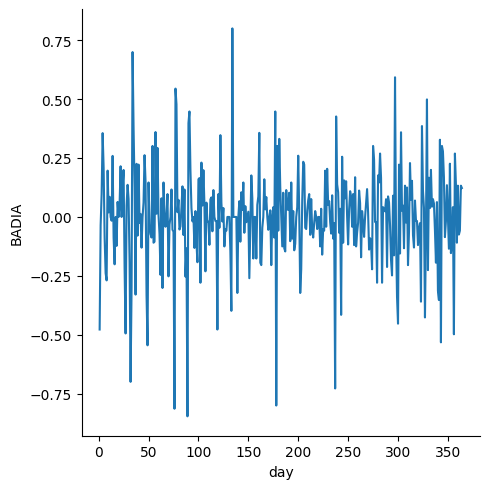

In [23]:
sns.relplot(df['BADIA'], kind='line')

In [24]:
import arma_2_1_no_nan

dizionario = arma_2_1_no_nan.fit_all_arma(df)

09:33:44 - cmdstanpy - INFO - compiling stan file /home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan to exe file /home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code
09:33:52 - cmdstanpy - INFO - compiled model executable: /home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code
09:33:52 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:33:59 - cmdstanpy - INFO - CmdStan done processing.
09:33:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:33:59 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:34:14 - cmdstanpy - INFO - CmdStan done processing.
09:34:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:34:14 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:34:30 - cmdstanpy - INFO - CmdStan done processing.
09:34:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:34:30 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:34:42 - cmdstanpy - INFO - CmdStan done processing.
09:34:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:34:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:34:56 - cmdstanpy - INFO - CmdStan done processing.
09:34:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:34:57 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:35:11 - cmdstanpy - INFO - CmdStan done processing.
09:35:11 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:35:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:35:25 - cmdstanpy - INFO - CmdStan done processing.
09:35:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:35:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:35:38 - cmdstanpy - INFO - CmdStan done processing.
09:35:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:35:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:35:47 - cmdstanpy - INFO - CmdStan done processing.
09:35:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:35:47 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:36:00 - cmdstanpy - INFO - CmdStan done processing.
09:36:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:36:00 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:36:12 - cmdstanpy - INFO - CmdStan done processing.
09:36:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:36:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:36:21 - cmdstanpy - INFO - CmdStan done processing.
09:36:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:36:21 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:36:33 - cmdstanpy - INFO - CmdStan done processing.
09:36:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:36:33 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:36:48 - cmdstanpy - INFO - CmdStan done processing.
09:36:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:36:48 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:37:03 - cmdstanpy - INFO - CmdStan done processing.
09:37:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:37:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:37:15 - cmdstanpy - INFO - CmdStan done processing.


09:37:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:37:22 - cmdstanpy - INFO - CmdStan done processing.
09:37:22 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:37:23 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:37:36 - cmdstanpy - INFO - CmdStan done processing.
09:37:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:37:37 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:37:49 - cmdstanpy - INFO - CmdStan done processing.
09:37:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:37:50 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:37:58 - cmdstanpy - INFO - CmdStan done processing.
09:37:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:37:58 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:38:11 - cmdstanpy - INFO - CmdStan done processing.
09:38:11 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:38:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:38:25 - cmdstanpy - INFO - CmdStan done processing.
09:38:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:38:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:38:40 - cmdstanpy - INFO - CmdStan done processing.
09:38:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:38:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:38:56 - cmdstanpy - INFO - CmdStan done processing.
09:38:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:38:56 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:39:10 - cmdstanpy - INFO - CmdStan done processing.
09:39:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:39:10 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:39:23 - cmdstanpy - INFO - CmdStan done processing.
09:39:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:39:23 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:39:33 - cmdstanpy - INFO - CmdStan done processing.
09:39:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:39:34 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:39:46 - cmdstanpy - INFO - CmdStan done processing.
09:39:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:39:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:39:59 - cmdstanpy - INFO - CmdStan done processing.
09:39:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:39:59 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:40:12 - cmdstanpy - INFO - CmdStan done processing.


09:40:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:40:26 - cmdstanpy - INFO - CmdStan done processing.
09:40:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:40:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:40:40 - cmdstanpy - INFO - CmdStan done processing.
09:40:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:40:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:40:54 - cmdstanpy - INFO - CmdStan done processing.
09:40:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:40:54 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:41:07 - cmdstanpy - INFO - CmdStan done processing.
09:41:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:41:07 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:41:20 - cmdstanpy - INFO - CmdStan done processing.
09:41:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:41:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:41:27 - cmdstanpy - INFO - CmdStan done processing.
09:41:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:41:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:41:40 - cmdstanpy - INFO - CmdStan done processing.
09:41:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:41:41 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:41:49 - cmdstanpy - INFO - CmdStan done processing.
09:41:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:41:50 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:42:04 - cmdstanpy - INFO - CmdStan done processing.
09:42:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:42:05 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:42:13 - cmdstanpy - INFO - CmdStan done processing.
09:42:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:42:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:42:28 - cmdstanpy - INFO - CmdStan done processing.


09:42:28 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:42:38 - cmdstanpy - INFO - CmdStan done processing.
09:42:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:42:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:42:52 - cmdstanpy - INFO - CmdStan done processing.
09:42:52 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:42:52 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:43:04 - cmdstanpy - INFO - CmdStan done processing.
09:43:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:43:05 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:43:12 - cmdstanpy - INFO - CmdStan done processing.
09:43:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:43:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:43:21 - cmdstanpy - INFO - CmdStan done processing.
09:43:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:43:21 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:43:34 - cmdstanpy - INFO - CmdStan done processing.
09:43:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:43:35 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:43:42 - cmdstanpy - INFO - CmdStan done processing.
09:43:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


09:43:42 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:43:57 - cmdstanpy - INFO - CmdStan done processing.
09:43:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/br1/PythonProjects/bayesian_project/git_dir/bayes_colab/ARMA_bayesian_stan/code.stan', line 33, column 8 to column 31)
Consider re-running with show_console=True if the above output is unclear!


In [25]:
for value in dizionario:
    dizionario[value].to_netcdf(filename='./inference_data_211/'+value+'.ncdf')